In [4]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#inline statement - displays the graphs in the current notebook
%matplotlib inline
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing

In [5]:
# loction
import os
os.getcwd()

'C:\\Users\\Shree'

In [6]:
data = pd.read_excel("data.xlsx")

C:\Users\Shree\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [7]:
data

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
...,...,...,...,...,...,...,...
377714,2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
377715,2020-08-07 12:00:00,879.9,895.02,-228.04,-211.28,878.08,-176.94
377716,2020-08-07 12:05:00,887.2,895.7,-230.11,-214.65,885.32,-179.18
377717,2020-08-07 12:10:00,908.5,916.33,-231.51,-218.09,906.2,-181.96


In [8]:
data.rename({'Cyclone_Inlet_Gas_Temp':'Cy_Inlet_Gas_Temp','Cyclone_Material_Temp':'Cy_Material_Temp','Cyclone_Outlet_Gas_draft':'Cy_Outlet_Gas_draft','Cyclone_cone_draft':'Cy_cone_draft','Cyclone_Gas_Outlet_Temp':'Cy_Gas_Outlet_Temp','Cyclone_Inlet_Draft':'Cy_Inlet_Draft',},axis=1,inplace=True)

In [9]:
data

,time,Cy_Inlet_Gas_Temp,Cy_Material_Temp,Cy_Outlet_Gas_draft,Cy_cone_draft,Cy_Gas_Outlet_Temp,Cy_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
...,...,...,...,...,...,...,...
377714,2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
377715,2020-08-07 12:00:00,879.9,895.02,-228.04,-211.28,878.08,-176.94
377716,2020-08-07 12:05:00,887.2,895.7,-230.11,-214.65,885.32,-179.18
377717,2020-08-07 12:10:00,908.5,916.33,-231.51,-218.09,906.2,-181.96


In [10]:
data.shape

(377719, 7)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   time                 377719 non-null  datetime64[ns]
 1   Cy_Inlet_Gas_Temp    377719 non-null  object        
 2   Cy_Material_Temp     377719 non-null  object        
 3   Cy_Outlet_Gas_draft  377719 non-null  object        
 4   Cy_cone_draft        377719 non-null  object        
 5   Cy_Gas_Outlet_Temp   377719 non-null  object        
 6   Cy_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


In [12]:
# Summary Statistics

In [13]:
data.isnull().sum()

time                   0
Cy_Inlet_Gas_Temp      0
Cy_Material_Temp       0
Cy_Outlet_Gas_draft    0
Cy_cone_draft          0
Cy_Gas_Outlet_Temp     0
Cy_Inlet_Draft         0
dtype: int64

In [14]:
for col in data.columns:
    print('column name: ',col)
    print(data[col].value_counts())
    print('---------------------------------')

column name:  time
2017-10-01 13:35:00    1
2017-02-23 02:45:00    1
2018-02-20 16:25:00    1
2017-11-05 05:50:00    1
2019-11-20 14:15:00    1
                      ..
2020-07-19 16:50:00    1
2018-12-16 09:15:00    1
2018-03-15 00:30:00    1
2018-03-06 22:30:00    1
2019-08-17 15:40:00    1
Name: time, Length: 377719, dtype: int64
---------------------------------
column name:  Cy_Inlet_Gas_Temp
Not Connect    723
I/O Timeout    470
23.53          309
900.12         161
879.55         159
              ... 
592.03           1
648.1            1
97.98            1
67.4             1
209.95           1
Name: Cy_Inlet_Gas_Temp, Length: 39736, dtype: int64
---------------------------------
column name:  Cy_Material_Temp
0.00       14226
94.31       3669
59.56       3409
41.64       2865
43.14       2829
           ...  
439.02         1
1036.13        1
260.65         1
96.53          1
274.06         1
Name: Cy_Material_Temp, Length: 39662, dtype: int64
---------------------------------

In [15]:
pd.DataFrame(data.dtypes,columns = ['data_type']).reset_index()

,index,data_type
0,time,datetime64[ns]
1,Cy_Inlet_Gas_Temp,object
2,Cy_Material_Temp,object
3,Cy_Outlet_Gas_draft,object
4,Cy_cone_draft,object
5,Cy_Gas_Outlet_Temp,object
6,Cy_Inlet_Draft,object


## Data Cleaning

In [16]:
data['Cy_Inlet_Gas_Temp']

0         867.63
1         879.23
2         875.67
3         875.28
4         891.66
           ...  
377714    899.42
377715     879.9
377716     887.2
377717     908.5
377718    880.86
Name: Cy_Inlet_Gas_Temp, Length: 377719, dtype: object

In [17]:
### Conversion of object Cy_Inlet_Gas_Temp column to numerical

data['Cy_Inlet_Gas_Temp'] = pd.to_numeric(data['Cy_Inlet_Gas_Temp'], errors='coerce')

In [18]:
data['Cy_Inlet_Gas_Temp'].dtypes

dtype('float64')

In [19]:
data['Cy_Material_Temp']

0         910.42
1         918.14
2         924.18
3         923.15
4         934.26
           ...  
377714    919.79
377715    895.02
377716     895.7
377717    916.33
377718    905.31
Name: Cy_Material_Temp, Length: 377719, dtype: object

In [20]:
### Conversion of object Cy_Material_Temp  column to numerical

data['Cy_Material_Temp'] = pd.to_numeric(data['Cy_Material_Temp'], errors='coerce')

In [21]:
data['Cy_Material_Temp'].dtypes

dtype('float64')

In [22]:
data['Cy_Outlet_Gas_draft']

0        -189.54
1        -184.33
2        -181.26
3        -179.15
4        -178.32
           ...  
377714   -224.07
377715   -228.04
377716   -230.11
377717   -231.51
377718   -235.02
Name: Cy_Outlet_Gas_draft, Length: 377719, dtype: object

In [23]:
### Conversion of object Cy_Outlet_Gas_draft column to numerical

data['Cy_Outlet_Gas_draft'] = pd.to_numeric(data['Cy_Outlet_Gas_draft'], errors='coerce')

In [24]:
data['Cy_Outlet_Gas_draft'].dtypes

dtype('float64')

In [25]:
data['Cy_cone_draft']

0        -186.04
1         -182.1
2        -166.47
3        -174.83
4        -173.72
           ...  
377714   -209.77
377715   -211.28
377716   -214.65
377717   -218.09
377718   -219.44
Name: Cy_cone_draft, Length: 377719, dtype: object

In [26]:
### Conversion of object Cy_cone_draft column to numerical

data['Cy_cone_draft'] = pd.to_numeric(data['Cy_cone_draft'], errors='coerce')

In [27]:
data['Cy_cone_draft'].dtypes

dtype('float64')

In [28]:
data['Cy_Gas_Outlet_Temp']

0         852.13
1         862.53
2         866.06
3         865.85
4         876.06
           ...  
377714    901.01
377715    878.08
377716    885.32
377717     906.2
377718     882.1
Name: Cy_Gas_Outlet_Temp, Length: 377719, dtype: object

In [29]:
### Conversion of object Cy_Gas_Outlet_Temp column to numerical

data['Cy_Gas_Outlet_Temp'] = pd.to_numeric(data['Cy_Gas_Outlet_Temp'], errors='coerce')

In [30]:
data['Cy_Gas_Outlet_Temp'].dtypes

dtype('float64')

In [31]:
data['Cy_Inlet_Draft']

0         -145.9
1        -149.76
2        -145.01
3        -142.82
4        -143.39
           ...  
377714   -175.15
377715   -176.94
377716   -179.18
377717   -181.96
377718   -184.02
Name: Cy_Inlet_Draft, Length: 377719, dtype: object

In [32]:
### Conversion of object Cy_Inlet_Draft column to numerical

data['Cy_Inlet_Draft'] = pd.to_numeric(data['Cy_Inlet_Draft'], errors='coerce')

In [33]:
data['Cy_Inlet_Draft'].dtypes

dtype('float64')

In [34]:
### Conversion of object Cy_Inlet_Draft column to numerical

data['time'] = pd.to_numeric(data['time'], errors='coerce')

In [35]:
data['time'].dtypes

dtype('int64')

In [36]:
pd.DataFrame(data.dtypes,columns = ['data_type']).reset_index()

,index,data_type
0,time,int64
1,Cy_Inlet_Gas_Temp,float64
2,Cy_Material_Temp,float64
3,Cy_Outlet_Gas_draft,float64
4,Cy_cone_draft,float64
5,Cy_Gas_Outlet_Temp,float64
6,Cy_Inlet_Draft,float64


In [37]:
data.describe()

,time,Cy_Inlet_Gas_Temp,Cy_Material_Temp,Cy_Outlet_Gas_draft,Cy_cone_draft,Cy_Gas_Outlet_Temp,Cy_Inlet_Draft
count,3.777190e+05,376399.000000,376128.000000,376398.000000,376399.000000,376398.000000,376397.000000
mean,1.540001e+18,727.348549,750.830483,-177.820685,-164.572619,715.759972,-141.302857
std,3.279899e+16,328.664814,350.921068,99.147236,90.103023,325.346446,77.615576
min,1.483229e+18,0.000000,-185.000000,-456.660000,-459.310000,13.790000,-396.370000
25%,1.511558e+18,856.270000,867.667500,-247.190000,-226.770000,801.960000,-193.510000
50%,1.539973e+18,882.380000,913.360000,-215.260000,-198.560000,871.525000,-169.460000
75%,1.568388e+18,901.110000,943.660000,-170.130000,-143.640000,899.300000,-136.290000
max,1.596802e+18,1157.630000,1375.000000,40.270000,488.860000,1375.000000,41.640000


# split date and time

In [38]:
data = pd.DataFrame()

data['date'] = pd.date_range('2017-01-01 00:00:00', periods=20, freq='W')
print(data)

         date
0  2017-01-01
1  2017-01-08
2  2017-01-15
3  2017-01-22
4  2017-01-29
5  2017-02-05
6  2017-02-12
7  2017-02-19
8  2017-02-26
9  2017-03-05
10 2017-03-12
11 2017-03-19
12 2017-03-26
13 2017-04-02
14 2017-04-09
15 2017-04-16
16 2017-04-23
17 2017-04-30
18 2017-05-07
19 2017-05-14


## Creating the year column form date time stamp.

In [39]:
 data['year'] = data['date'].dt.year

## Creating the month column form date time stamp.


In [40]:
data['month'] = data['date'].dt.month


## Creating the day column form date time stamp.


In [41]:
data['day'] = data['date'].dt.day

## Creating the hour column form date time stamp.

In [42]:
data['hour'] = data['date'].dt.hour

## Creating the hour column form date time stamp.

In [43]:
data['hour'] = data['date'].dt.hour


In [44]:
data

,date,year,month,day,hour
0,2017-01-01,2017,1,1,0
1,2017-01-08,2017,1,8,0
2,2017-01-15,2017,1,15,0
3,2017-01-22,2017,1,22,0
4,2017-01-29,2017,1,29,0
5,2017-02-05,2017,2,5,0
6,2017-02-12,2017,2,12,0
7,2017-02-19,2017,2,19,0
8,2017-02-26,2017,2,26,0
9,2017-03-05,2017,3,5,0


In [45]:
data['date'] = pd.to_numeric(data['date'], errors='coerce')

In [46]:
data['date'].dtypes

dtype('int64')

In [47]:
data['year'] = pd.to_numeric(data['year'], errors='coerce')

In [48]:
data['year'].dtypes

dtype('int64')

In [49]:
data['month'] = pd.to_numeric(data['month'], errors='coerce')

In [50]:
data['month'].dtypes

dtype('int64')

In [51]:
data['day'] = pd.to_numeric(data['day'], errors='coerce')

In [52]:
data['day'].dtypes

dtype('int64')

In [53]:
data['hour'] = pd.to_numeric(data['hour'], errors='coerce')

In [54]:
data['hour'].dtypes

dtype('int64')

In [55]:
pd.DataFrame(data.dtypes,columns = ['data_type']).reset_index()

,index,data_type
0,date,int64
1,year,int64
2,month,int64
3,day,int64
4,hour,int64


## EDA

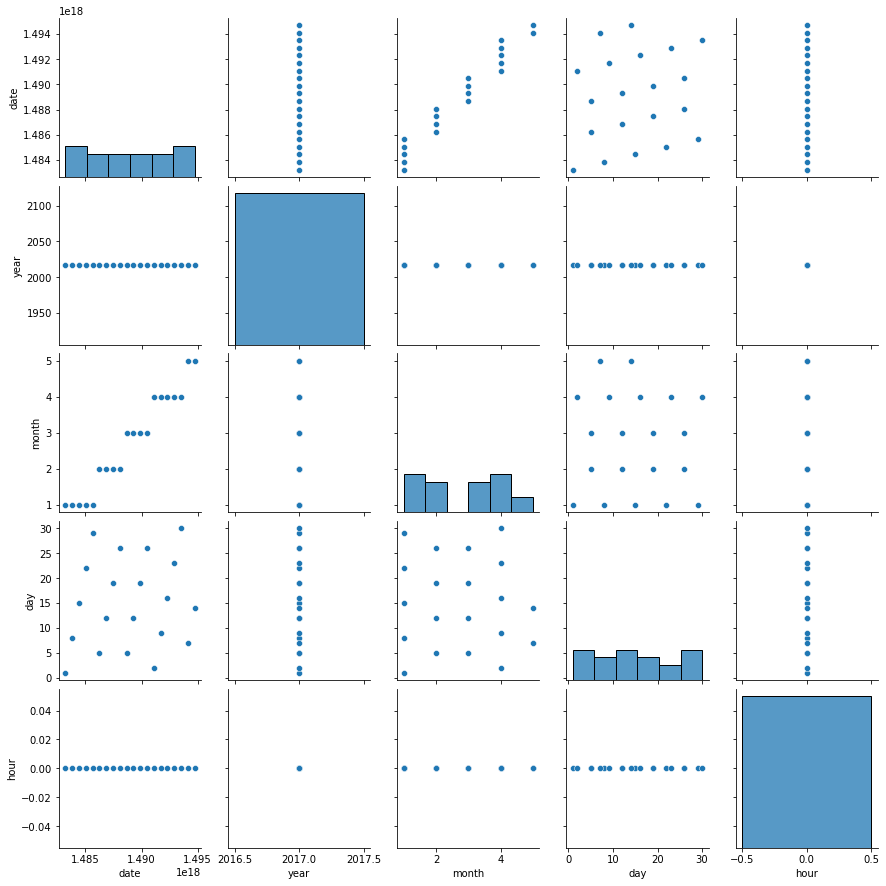

In [56]:
sns.pairplot(data)

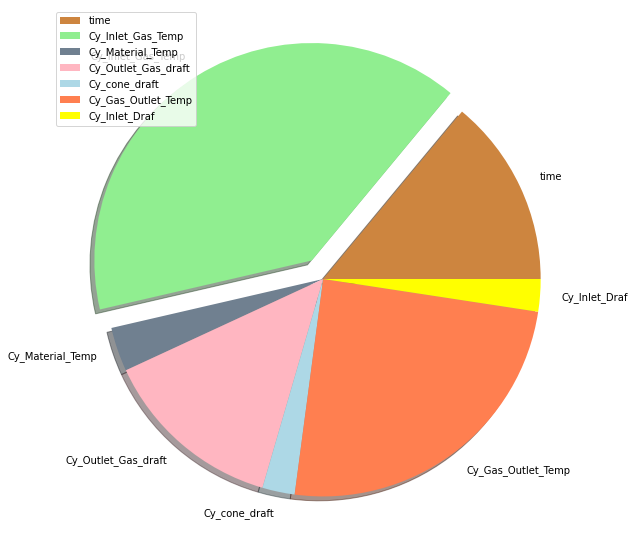

In [57]:
plt.figure(figsize=(10,10))

values = [145, 411, 34, 141, 25, 256,25]
colors = ['peru','lightgreen','slategrey','lightpink','lightblue','coral','yellow',]
labels = ['time','Cy_Inlet_Gas_Temp','Cy_Material_Temp','Cy_Outlet_Gas_draft','Cy_cone_draft','Cy_Gas_Outlet_Temp','Cy_Inlet_Draf']
explode = (0, 0.1, 0, 0, 0, 0,0)
plt.pie(values, colors=colors,labels= labels,explode=explode,shadow=True)
plt.title('')
plt.legend(labels,loc=0) 



In [58]:
# Splitting the dataset into the Training set and Test set

X = data.loc[:,data.columns!="Start_Tech_Oscar"]
type(X)

pandas.core.frame.DataFrame

In [59]:
X.head()

,date,year,month,day,hour
0,1483228800000000000,2017,1,1,0
1,1483833600000000000,2017,1,8,0
2,1484438400000000000,2017,1,15,0
3,1485043200000000000,2017,1,22,0
4,1485648000000000000,2017,1,29,0


In [60]:
X.shape

(20, 5)

In [61]:
y = data.loc[:,data.columns!="Start_Tech_Oscar"]
type(y)

pandas.core.frame.DataFrame

In [62]:
y.head()

,date,year,month,day,hour
0,1483228800000000000,2017,1,1,0
1,1483833600000000000,2017,1,8,0
2,1484438400000000000,2017,1,15,0
3,1485043200000000000,2017,1,22,0
4,1485648000000000000,2017,1,29,0


In [63]:
y.shape

(20, 5)

In [64]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test, = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [65]:
# Check for the sampled data
print(X_Train.shape)
print(y_Train.shape)
print(X_Test.shape)
print(y_Test.shape)

(15, 5)
(15, 5)
(5, 5)
(5, 5)


In [66]:
# set target feature
targetFeature='time'

In [70]:
data

,date,year,month,day,hour
0,1483228800000000000,2017,1,1,0
1,1483833600000000000,2017,1,8,0
2,1484438400000000000,2017,1,15,0
3,1485043200000000000,2017,1,22,0
4,1485648000000000000,2017,1,29,0
5,1486252800000000000,2017,2,5,0
6,1486857600000000000,2017,2,12,0
7,1487462400000000000,2017,2,19,0
8,1488067200000000000,2017,2,26,0
9,1488672000000000000,2017,3,5,0


## Multiple linear regression

In [67]:

#Model 1= Multiple linear regression
# fit a model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
lm = LinearRegression()
model1 = lm.fit(X_Train, y_Train)
predictions1 = lm.predict(X_Test)
m1=model1.score(X_Test, y_Test)
RMSE1=np.sqrt(metrics.mean_squared_error(y_Test, predictions1))
print('Accuracy of model is', model1.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions1)))

Accuracy of model is 0.9542677889424258
Mean Absolute Error: 0.5504411985684238
Mean Squared Error: 2.0776708108144852
Root Mean Squared Error: 1.4414127829371035


<AxesSubplot:xlabel='year', ylabel='date'>

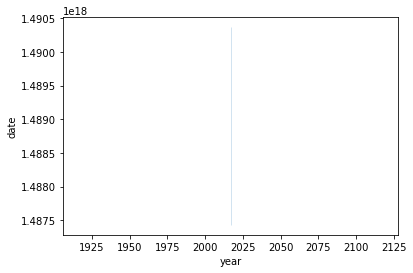

In [90]:
sns.lineplot(data = data, x = 'year', y = 'date')

# LASSO Regression

In [68]:
# Model 2: LASSO Model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import metrics
las = Lasso(alpha=0.1)
model2 = las.fit(X_Train, y_Train)
predictions2 = las.predict(X_Test)
m2=model2.score(X_Test, y_Test)
RMSE2=np.sqrt(metrics.mean_squared_error(y_Test, predictions2))
print('Accuracy of model is', model2.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions2)))

Accuracy of model is 0.999936265700466
Mean Absolute Error: 0.006328987276461503
Mean Squared Error: 0.00018379417387786912
Root Mean Squared Error: 0.013557070991842933


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03895856068348821, tolerance: 0.0021600000000000005
  model = cd_fast.enet_coordinate_descent(


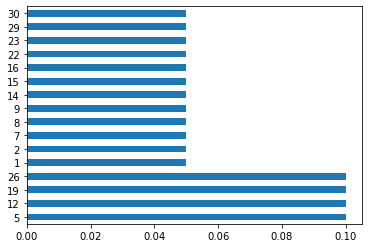

In [91]:
data.hour.value_counts(normalize=True)

data.day.value_counts(normalize=True).plot.barh()
plt.show()


# RIDGE Regression

In [92]:
# Model 3: RIDGE Model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn import metrics
Rid = Ridge(alpha=0.1)
model3 = Rid.fit(X_Train, y_Train)
predictions3 = Rid.predict(X_Test)
m3=model3.score(X_Test, y_Test)
RMSE3=np.sqrt(metrics.mean_squared_error(y_Test, predictions3))
print('Accuracy of model is', model3.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions3)))

Accuracy of model is 0.0008091199916976377
Mean Absolute Error: 0.032420075026172335
Mean Squared Error: 0.007929578823745887
Root Mean Squared Error: 0.08904818259653527


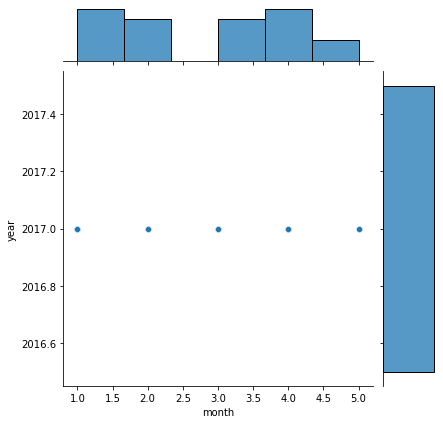

In [96]:
sns.jointplot(data=data, x="month", y="year" )

# Random forest

In [99]:
# Model 4: Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
Rnd = RandomForestRegressor(ccp_alpha=0.0)
model4 = Rnd.fit(X_Train, y_Train)
predictions4 = Rnd.predict(X_Test)
m4=model4.score(X_Test, y_Test)
RMSE4=np.sqrt(metrics.mean_squared_error(y_Test, predictions4))
print('Accuracy of model is', model4.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions4)))

Accuracy of model is -0.44747983870967767
Mean Absolute Error: 0.029439999999999997
Mean Squared Error: 0.011487200000000001
Root Mean Squared Error: 0.10717835602396597


C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

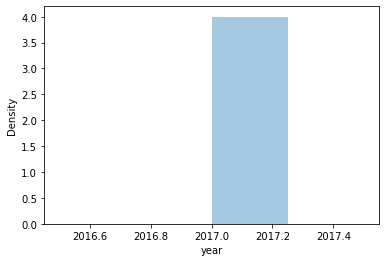

In [100]:
sns.distplot(data.year)

# Decision tree 

In [102]:
# Model 5: Decision tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
dtr = DecisionTreeRegressor(ccp_alpha=0.0)
model5 = dtr.fit(X_Train, y_Train)
predictions5 = dtr.predict(X_Test)
m5=model5.score(X_Test,y_Test)
RMSE5=np.sqrt(metrics.mean_squared_error(y_Test, predictions5))
print('Accuracy of model is', model5.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions5))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions5))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions5)))

Accuracy of model is -4.040322580645162
Mean Absolute Error: 0.04
Mean Squared Error: 0.04
Root Mean Squared Error: 0.2


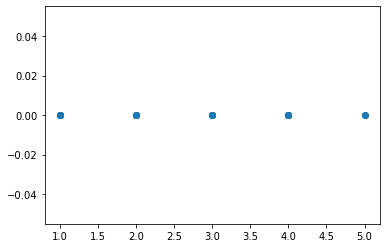

In [103]:
plt.scatter(data.month,data.hour)
plt.show()



# KNN 

In [105]:
# Model 6: KNN 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
knn = KNeighborsRegressor(n_neighbors=2)
model6 = knn.fit(X_Train, y_Train)
predictions6 = knn.predict(X_Test)
m6=model6.score(X_Test, y_Test)
RMSE6=np.sqrt(metrics.mean_squared_error(y_Test, predictions6))
print('Accuracy of model is', model6.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions6))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions6))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions6)))

Accuracy of model is -0.7641129032258067
Mean Absolute Error: 0.02
Mean Squared Error: 0.014
Root Mean Squared Error: 0.11832159566199232


C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shree\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:xlabel='month', ylabel='Density'>

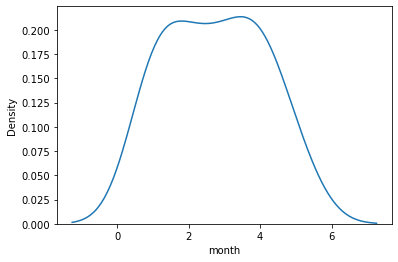

In [107]:
sns.distplot(data.month,data.year)

# SVM 

In [108]:
# Model 7: SVM regression
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn import metrics
svm= svm.SVR(kernel='linear')
model7 = svm.fit(X_Train, y_Train)
predictions7 = svm.predict(X_Test)
m7=model7.score(X_Test, y_Test)
RMSE7=np.sqrt(metrics.mean_squared_error(y_Test, predictions7))
print('Accuracy of model is', model7.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions7))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions7))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions7)))

Accuracy of model is -1.058569527688785
Mean Absolute Error: 0.10607818069485928
Mean Squared Error: 0.016336807771738196
Root Mean Squared Error: 0.1278155224209415


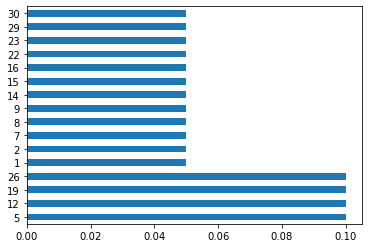

In [110]:
data.year.value_counts(normalize=True)

data.day.value_counts(normalize=True).plot.barh()
plt.show()


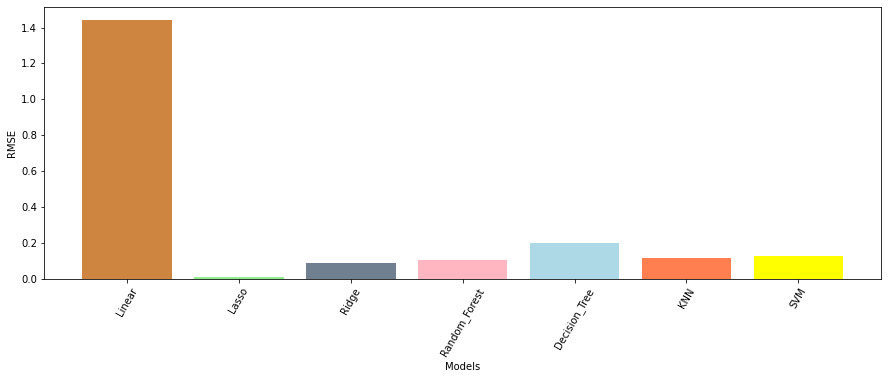

In [111]:
# Model Comparison
height = [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6, RMSE7]
bars = ('Linear', 'Lasso', 'Ridge', 'Random_Forest', 'Decision_Tree', 'KNN', 'SVM')
plt.figure(figsize=(15,5))
plt.bar(bars,height,color=colors)
plt.xticks(rotation=60)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()